<a href="https://colab.research.google.com/github/taerri/meal-kit-analysis/blob/main/04_2_%EB%B9%85%EC%B9%B4%EC%9D%B8%EC%A6%88_%EB%B0%80%ED%82%A4%ED%8A%B8_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC_%EB%B6%84%EC%84%9D_PageRank(%EB%B3%B8_%EA%B3%BC%EC%A0%95%EC%9D%80_Colab%EC%9C%BC%EB%A1%9C_%EC%8B%A4%ED%96%89).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4-3 페이지랭크**

### **N-gram 분석 후 상위 250여개 데이터(n-gram_분석결과.csv)를 살펴 본 후, 분석 목적에 맞게 수동으로 데이터 수정(n-gram_분석결과_전처리.csv)이후 수정된 데이터를 페이지랭크 분석에 활용함**

### **파일 읽기 및 단어 상위 250개 가져오기**

In [ ]:
import pandas as pd
df=pd.read_csv('n-gram_분석결과_전처리.csv')

df250 = df.iloc[:250]
wordList=[]
for row in df250.itertuples(index=False):
    if row.word1!= row.word2:
        wordList.append((row.word1,row.word2))
wordList

[('밀키트', '시장'),
 ('밀키트', '제품'),
 ('배송', '서비스'),
 ('새벽', '배송'),
 ('신선', '식품'),
 ('선물', '세트'),
 ('밀키트', '상품'),
 ('밀키트', '브랜드'),
 ('손질', '식재료'),
 ('코로나19', '사태'),
 ('밀키트', '출시'),
 ('코로나19', '확산'),
 ('간편식', '시장'),
 ('밀키트', '매출'),
 ('정기', '배송'),
 ('배달', '서비스'),
 ('제품', '출시'),
 ('시장', '규모'),
 ('서비스', '제공'),
 ('오프라인', '매장'),
 ('시장', '진출'),
 ('1인', '가구'),
 ('밀키트', '전문'),
 ('확대', '계획'),
 ('시장', '성장'),
 ('할인', '판매'),
 ('식재료', '양념'),
 ('프레시지', '밀키트'),
 ('밀키트', '판매'),
 ('요리', '밀키트'),
 ('최대', '할인'),
 ('지원', '사업'),
 ('피코크', '밀키트'),
 ('상품', '판매'),
 ('메뉴', '밀키트'),
 ('수요', '증가'),
 ('구독', '서비스'),
 ('간편식', '밀키트'),
 ('할인', '행사'),
 ('구독', '경제'),
 ('할인', '최대'),
 ('이마트', '피코크'),
 ('온라인', '판매'),
 ('제품', '판매'),
 ('구매', '고객'),
 ('판매', '시작'),
 ('프리미엄', '밀키트'),
 ('소비', '트렌드'),
 ('한국야쿠르트', '잇츠온'),
 ('서비스', '시작'),
 ('밀키트', '손질'),
 ('시장', '밀키트'),
 ('이벤트', '진행'),
 ('심플리쿡', '밀키트'),
 ('코로나19', '장기'),
 ('재료', '손질'),
 ('이마트', '밀키트'),
 ('세트', '구성'),
 ('밀키트', '인기'),
 ('밀키트', '사업'),
 ('코로나19', '영향'),
 ('상품', '구매'),
 ('추석', 

In [ ]:
uniqueWordList = df250.word1.unique()

폰트 설치(구글 코랩에서만 가능)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

### **상위 250개 데이터 페이지 랭크 결과**

{'밀키트': 0.060375690370929956, '배송': 0.015784750712691146, '새벽': 0.002376770656579445, '신선': 0.002376770656579445, '선물': 0.003386943763082896, '손질': 0.01383519961255053, '코로나19': 0.00611452134541484, '간편식': 0.0077401829366531075, '정기': 0.002376770656579445, '배달': 0.004397116869586347, '제품': 0.012467335382926862, '시장': 0.01350407002796098, '서비스': 0.01143223771023258, '오프라인': 0.002376770656579445, '1인': 0.002376770656579445, '확대': 0.008523214828606933, '할인': 0.010660299393213174, '식재료': 0.008250803873566123, '프레시지': 0.005622269872995139, '요리': 0.006730009830149658, '최대': 0.004189356897376942, '지원': 0.004709663617142756, '피코크': 0.003908921632162659, '상품': 0.015982485800369334, '메뉴': 0.004709663617142756, '수요': 0.004397116869586347, '구독': 0.003386943763082896, '이마트': 0.005407289976089797, '온라인': 0.003524576728302325, '구매': 0.007915281337310369, '판매': 0.012820444111976855, '프리미엄': 0.002376770656579445, '소비': 0.004397116869586347, '한국야쿠르트': 0.002376770656579445, '이벤트': 0.002376770656579445, '

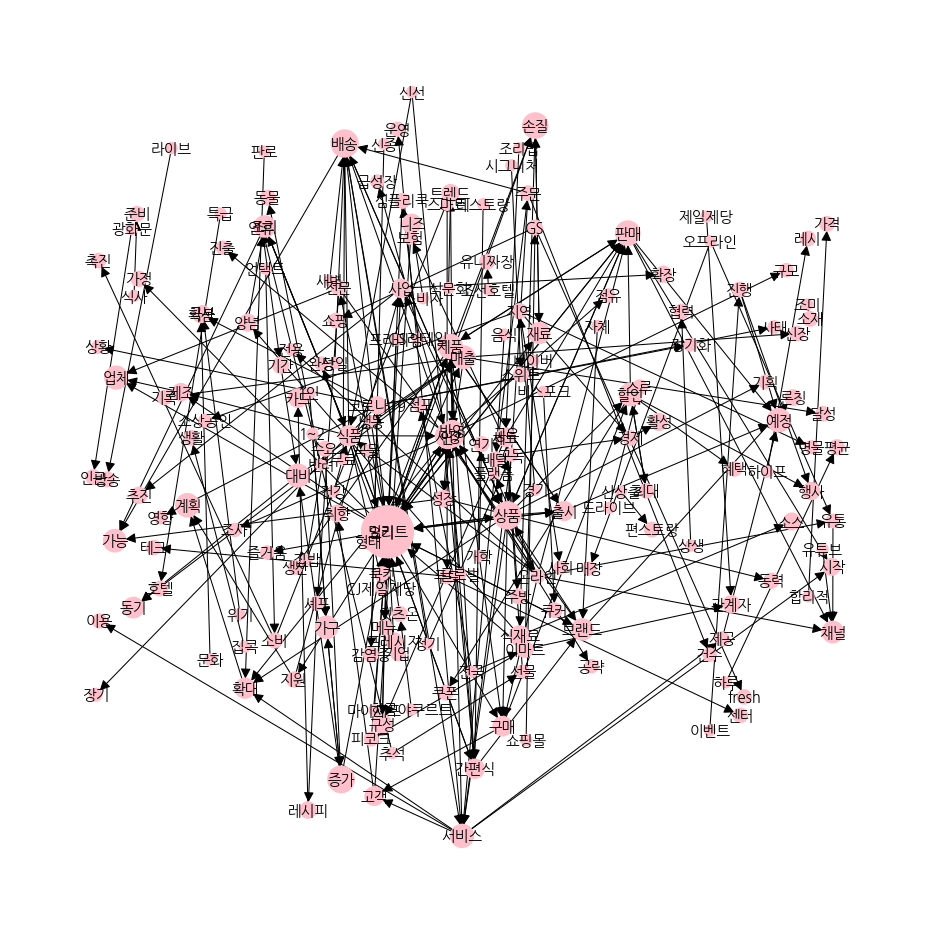

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 
import matplotlib.font_manager as fm

a=nx.DiGraph()

node = uniqueWordList
a.add_nodes_from(node)

a.add_edges_from (wordList)
i = 0

font_location='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop=fm.FontProperties(fname=font_location,size=30).get_name()

pg=nx.pagerank(a,max_iter=100)
print(pg)

pos=nx.spring_layout(a)

#Push every node to the right so that coordinates are all positive
for node in a.nodes:
    pos[node]=[pos[node][0]+1000,pos[node][1]+1000]

#Check distances between nodes for number of iterations
for x in range(20):
    for nodex in a.nodes:
      for nodey in a.nodes:
          if(nodex != nodey):
              # if y distance is too small
              if(max(pos[nodex][1],pos[nodey][1])-min(pos[nodex][1],pos[nodey][1]) <0.6):
                  # check if also x distance is too small
                  if((max(pos[nodex][0],pos[nodey][0])-min(pos[nodex][0],pos[nodey][0])<0.3)):
                      #print(nodex,nodey)
                      if(pos[nodex][1] < pos[nodey][1]):
                          pos[nodex][1] = pos[nodex][1]-0.6
                          pos[nodey][1] = pos[nodey][1]+0.6
                      else:
                          pos[nodex][1] = pos[nodex][1]+0.6
                          pos[nodey][1] = pos[nodey][1]-0.6


plt.figure(figsize=(6,6), dpi=150, facecolor='w')
nx.draw(a,pos, node_color='pink',node_size=[v * 10000 for v in pg.values()], 
        with_labels = True, font_family=fontprop, edge_cmap=plt.cm.OrRd, font_size=7, width=0.5)    #pagerank 값에 10000을 곱하여 노드 크기 설정

plt.show()

## **4-4 페이지랭크 분석 결과**

### **상위 250개 중 특정 단어 관련 페이지 랭크 결과**

In [ ]:
result=[]
key=['제품', '요리', '지역', '사업', '코로나19', '배송', '트렌드', '플랫폼', '온라인']
for row in df250.itertuples(index=False):
    if row.word1 in key or row.word2 in key:
        result.append([row.word1,row.word2])
result=pd.DataFrame(result,columns=['word1','word2'])

In [ ]:
result.head()

,word1,word2
0,밀키트,제품
1,배송,서비스
2,새벽,배송
3,코로나19,사태
4,코로나19,확산


## **4-5 페이지랭크 시각화**

{'밀키트': 0.022367143826037394, '배송': 0.09148575163520169, '새벽': 0.009669598157491488, '코로나19': 0.01788887142913131, '정기': 0.009669598157491488, '제품': 0.0728607119739768, '요리': 0.022641384601601137, '지원': 0.009669598157491488, '온라인': 0.03741759883289294, '소비': 0.009669598157491488, '간편식': 0.009669598157491488, '당일': 0.009669598157491488, '주문': 0.009669598157491488, '지역': 0.01788887142913131, '사업': 0.02617529657701212, '상품': 0.029110310803594733, '감염증': 0.009669598157491488, '인기': 0.018517994724243127, '식품': 0.013203510132902472, '출시': 0.018517994724243127, '국물': 0.009669598157491488, '무료': 0.009669598157491488, '판매': 0.02205190669965411, '트렌드': 0.02610814470077113, '시장': 0.032644222779005715, '식문화': 0.009669598157491488, '경기': 0.009669598157491488, '서비스': 0.03795870737034637, '사태': 0.012203849388377546, '확산': 0.012203849388377546, '장기': 0.012203849388377546, '영향': 0.012203849388377546, '가능': 0.029110310803594733, '완성': 0.013518747259285755, '생산': 0.018517994724243127, '즐거움': 0.0135187472

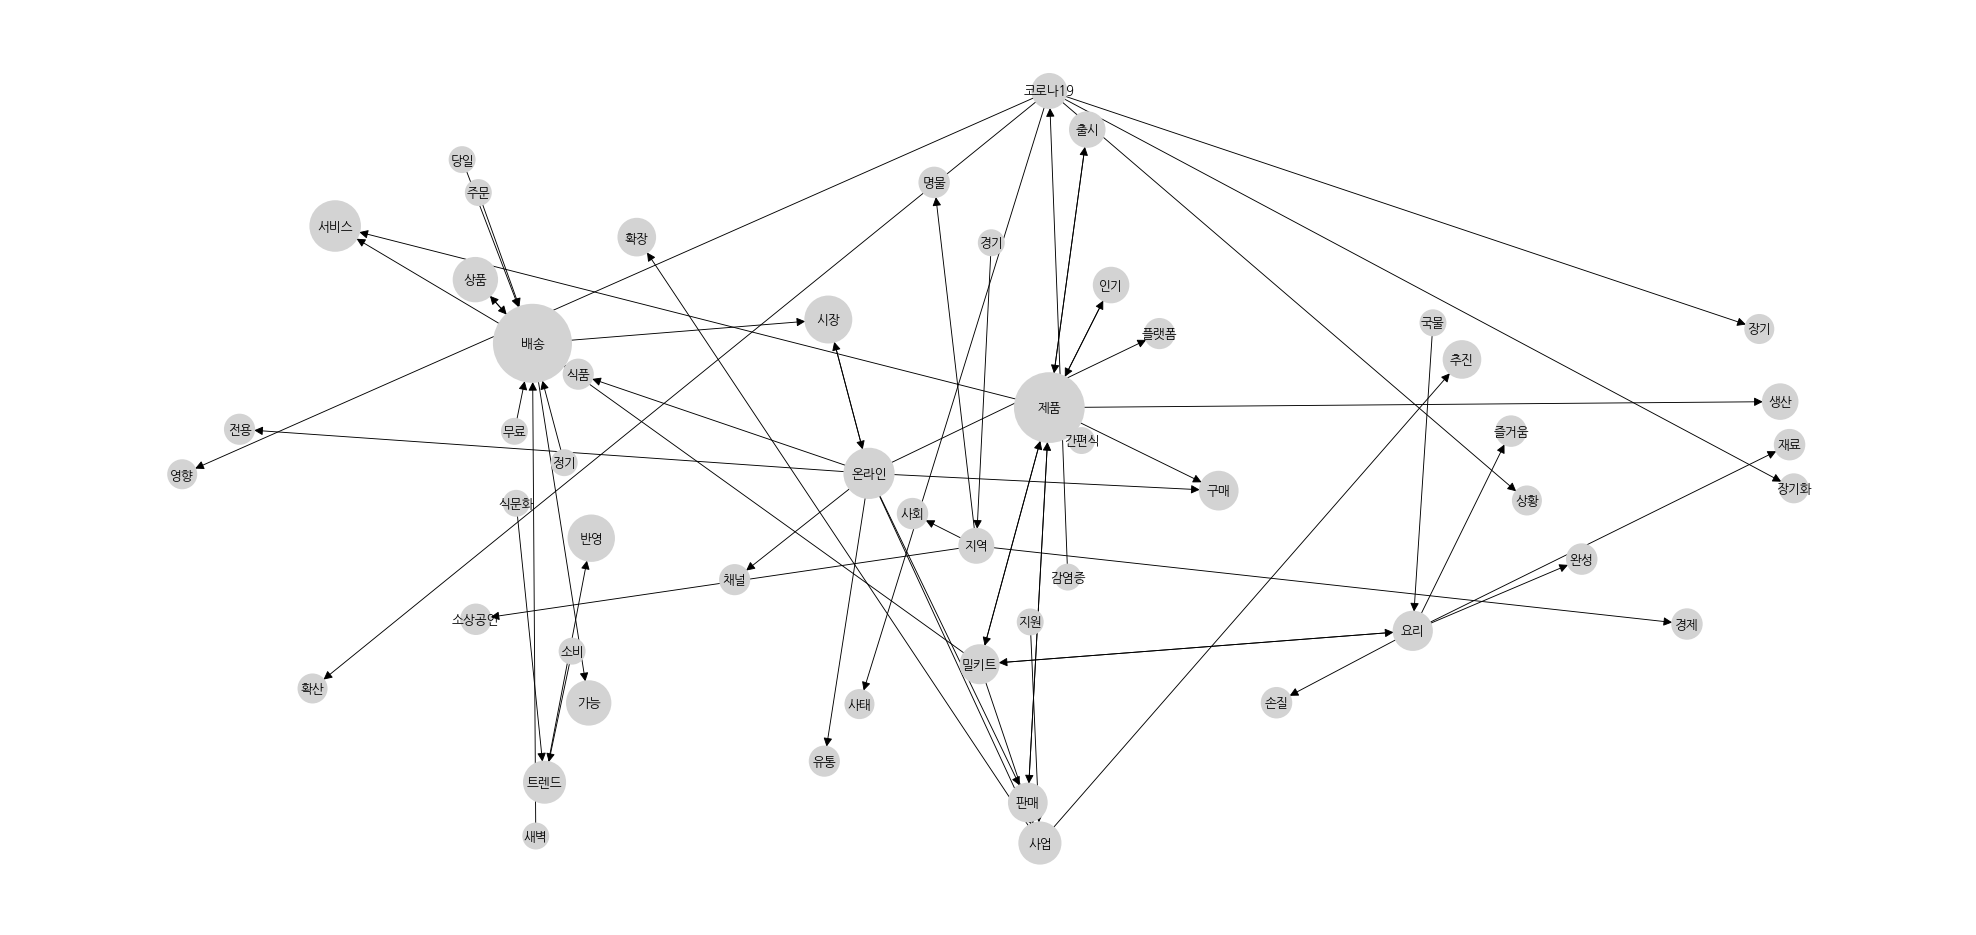

In [ ]:
uniqueWordList = result.word1.unique()
result2=[]
for row in result.itertuples(index=False):
    result2.append((row.word1,row.word2))


a=nx.DiGraph()

node = uniqueWordList
a.add_nodes_from(node)

a.add_edges_from (result2)
i = 0
# for name in node:
#     i = i+1
#     print(["%d:%s = %s"% (i,name,str(len(a.out_edges(name))))])

font_location='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop=fm.FontProperties(fname=font_location,size=30).get_name()

pg=nx.pagerank(a,max_iter=100)
print(pg)

pos=nx.spring_layout(a)

#Push every node to the right so that coordinates are all positive
for node in a.nodes:
    pos[node]=[pos[node][0]+1000,pos[node][1]+1000]

#Check distances between nodes for number of iterations
for x in range(20):
    for nodex in a.nodes:
      for nodey in a.nodes:
          if(nodex != nodey):
              # if y distance is too small
              if(max(pos[nodex][1],pos[nodey][1])-min(pos[nodex][1],pos[nodey][1]) <0.6):
                  # check if also x distance is too small
                  if((max(pos[nodex][0],pos[nodey][0])-min(pos[nodex][0],pos[nodey][0])<0.3)):
                      #print(nodex,nodey)
                      if(pos[nodex][1] < pos[nodey][1]):
                          pos[nodex][1] = pos[nodex][1]-0.6
                          pos[nodey][1] = pos[nodey][1]+0.6
                      else:
                          pos[nodex][1] = pos[nodex][1]+0.6
                          pos[nodey][1] = pos[nodey][1]-0.6


plt.figure(figsize=(15,7), dpi=130, facecolor='w')
nx.draw(a,pos=pos,node_color='lightgrey', node_size=[v * 20000 for v in pg.values()]
        ,with_labels = True, font_family=fontprop, edge_cmap=plt.cm.OrRd, font_size=7, width=0.5)

plt.show()

In [ ]:
new=pd.DataFrame.from_dict([pg])
df = new.transpose()
df.columns=['PageRank']
df.head()
df.to_csv('pagerank결과.csv',encoding='utf-8-sig')

*폰트 변경 시 폰트 경로 확인

In [ ]:
font_list=fm.findSystemFonts(fontpaths=None,fontext='ttf')
font_list[:10]